# Análise Exploratória de Dados: Sample - Superstore Sales 
- objetivo é responder algumas perguntas de negócio a partir de um dataset sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA.

## Importando as libs
- pandas
- numpy
- matplotlib
- seaborn

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Importando o dataset

In [2]:
df = pd.read_csv('dataset.csv')

## Verificando 5 linhas aleatórias

In [11]:
df.sample(5)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
5876,CA-2017-133319,05/09/2017,MV-17485,Consumer,United States,New York City,New York,OFF-PA-10001815,Office Supplies,Paper,192.160
8704,CA-2015-146815,08/09/2015,PP-18955,Home Office,United States,New York City,New York,OFF-AR-10003469,Office Supplies,Art,3.520
527,CA-2018-113558,21/10/2018,PH-18790,Home Office,United States,Lakeland,Florida,FUR-FU-10001756,Furniture,Furnishings,45.696
5228,CA-2018-124436,19/03/2018,SA-20830,Consumer,United States,Fresno,California,FUR-FU-10001185,Furniture,Furnishings,30.930
1437,CA-2016-139731,15/10/2016,JE-15745,Consumer,United States,Amarillo,Texas,TEC-AC-10004975,Technology,Accessories,263.880


## Verificando se contém valores nulos

In [14]:
df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

## Perguntas

#### 1. Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [83]:
df.query("Categoria == 'Office Supplies'")\
  .groupby('Cidade')['Valor_Venda']\
  .sum()\
  .sort_values(ascending=False).idxmax()

'New York City'

#### 2. Qual o Total de Vendas Por Data do Pedido?<br>Demonstre o resultado através de um gráfico de barras

In [95]:
total_vendas_por_data_pedido = df.groupby(df['Data_Pedido'])['Valor_Venda'].sum()

Text(0.5, 1.0, 'Total de Vendas por Data do Pedido')

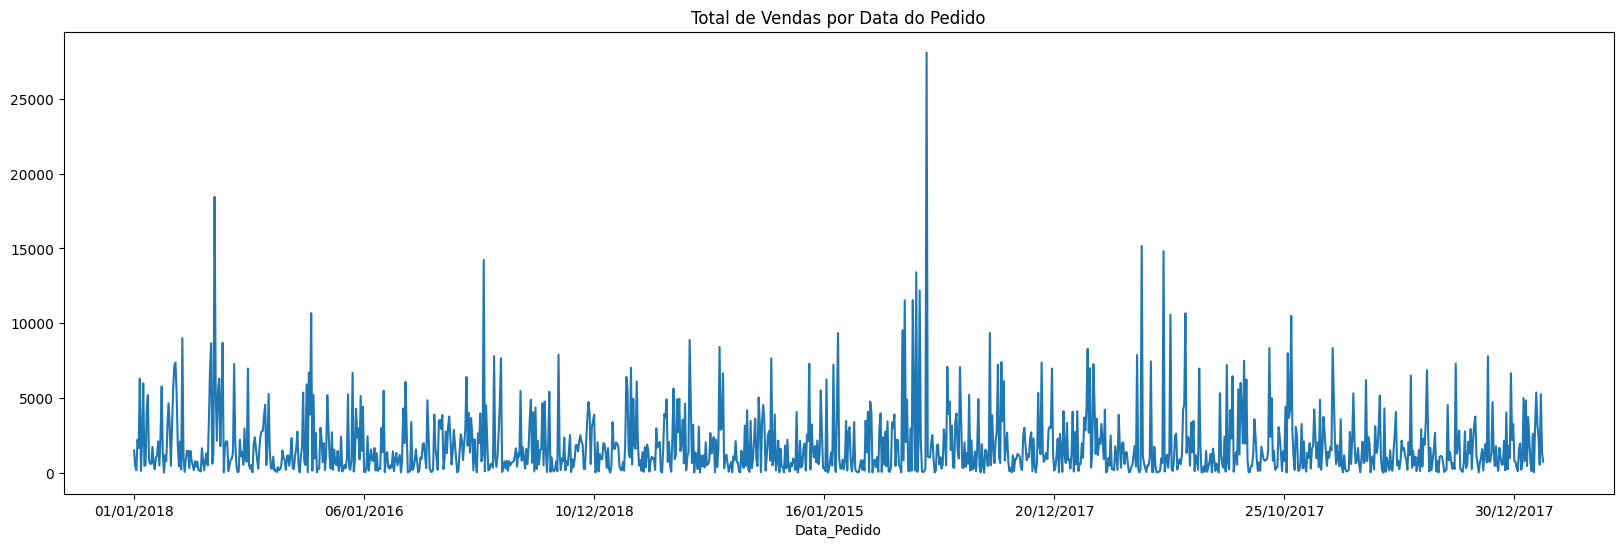

In [97]:
plt.figure(figsize=(20, 6))
total_vendas_por_data_pedido.plot(x = 'Data_Pedido', y='Valor_Venda')
plt.title('Total de Vendas por Data do Pedido')

#### 3. Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras.

In [99]:
total_vendas_por_estado = df.groupby(df['Estado'])['Valor_Venda'].sum()

Text(0.5, 1.0, 'Total de Vendas por Data do Pedido')

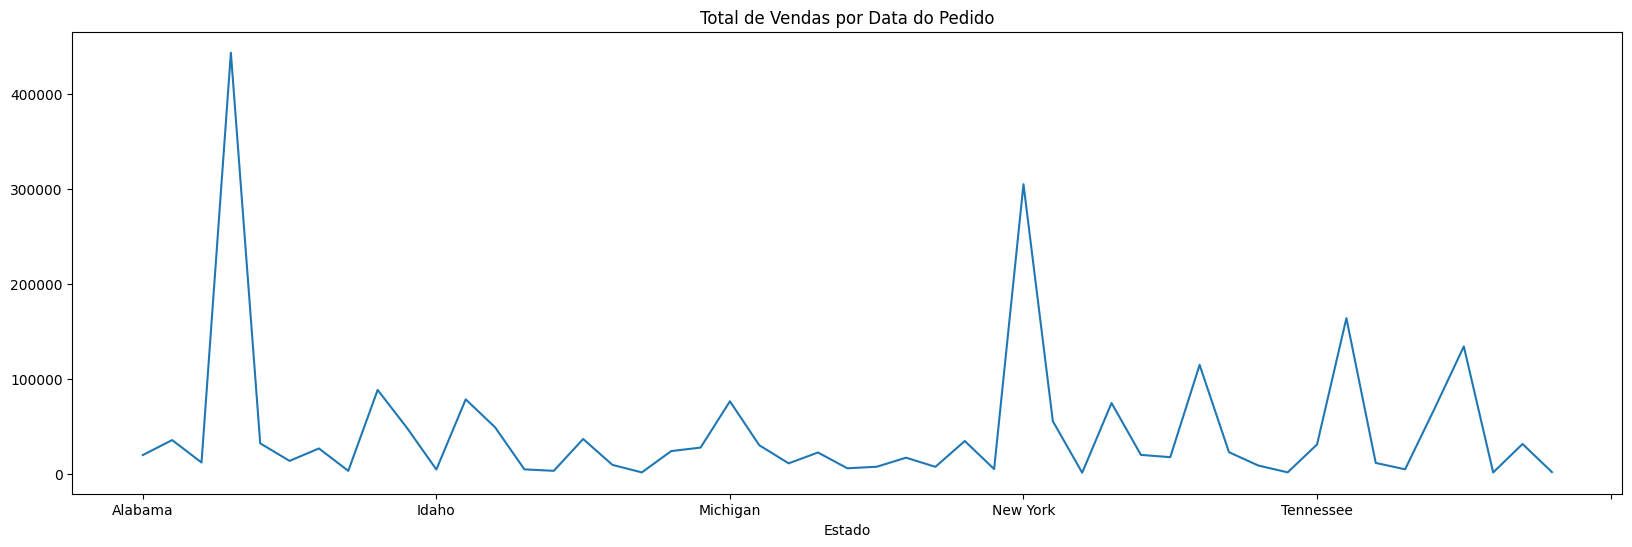

In [101]:
plt.figure(figsize=(20, 6))
total_vendas_por_estado.plot(x = 'Valor_Venda', y='Estado')
plt.title('Total de Vendas por Data do Pedido')

#### 4. Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.

In [106]:
df_10_cidades_maior_total_vendas = df.groupby(df['Cidade'])['Valor_Venda'].sum().sort_values(ascending=False).head(10)

Text(0.5, 1.0, 'As 10 cidades com o maior total de Vendas')

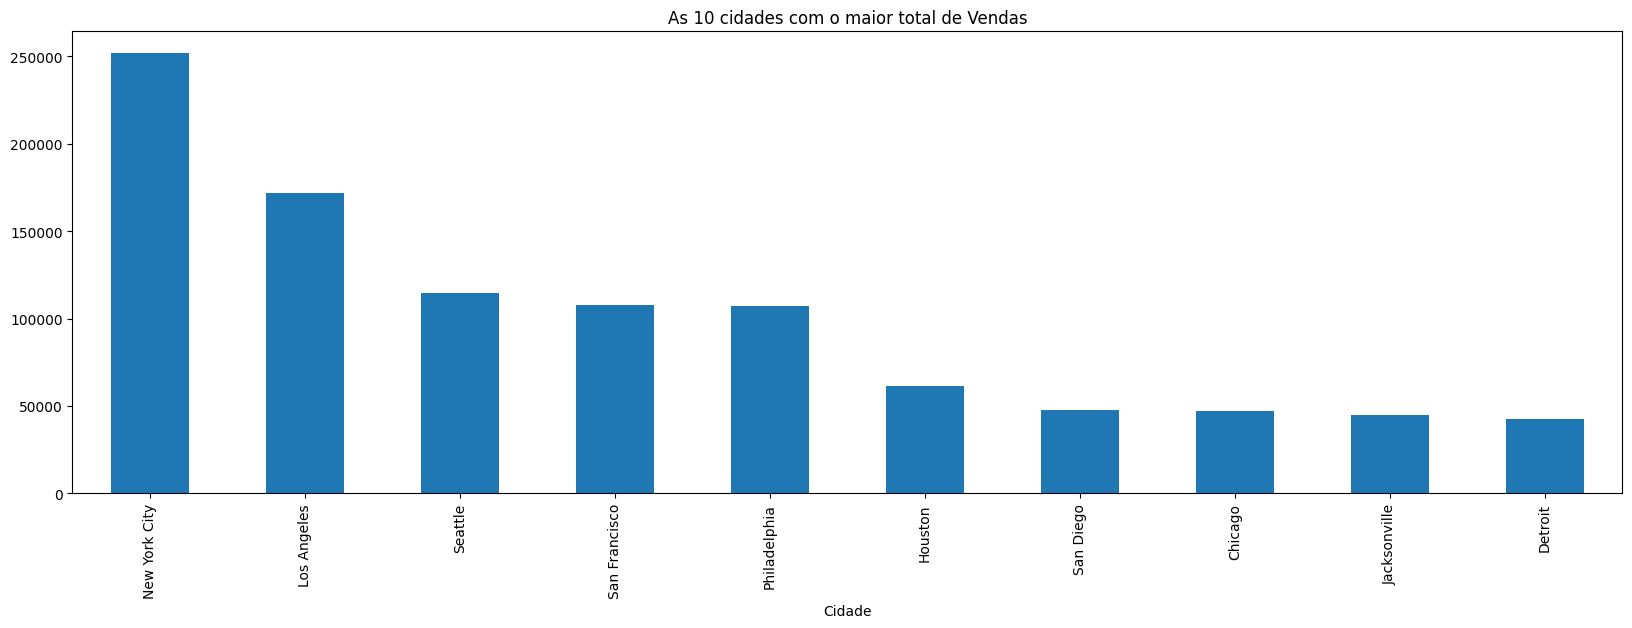

In [115]:
plt.figure(figsize=(20, 6))
df_10_cidades_maior_total_vendas.plot.bar(x = 'Cidades', y = 'Valor_Venda')
plt.title('As 10 cidades com o maior total de Vendas')

#### 5. Qual Segmento Teve o Maior Total de Vendas?Demonstre o resultado através de um gráfico de pizza.

In [119]:
df_segmento_maior_total_vendas = df.groupby(df['Segmento'])['Valor_Venda'].sum()

<Axes: title={'center': 'Segmento com o Maior Total de Vendas'}, ylabel='Valor_Venda'>

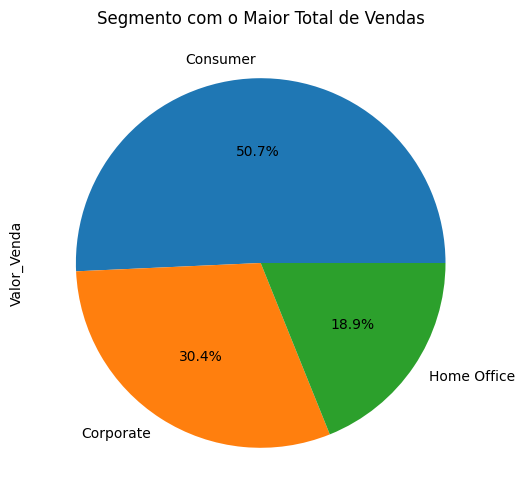

In [123]:
plt.figure(figsize=(20, 6))
plt.title('Segmento com o Maior Total de Vendas')
df_segmento_maior_total_vendas.plot.pie(labels=df_segmento_maior_total_vendas.index, autopct='%1.1f%%')

#### 6. Qual o Total de Vendas Por Segmento e Por Ano?


In [128]:
df['Ano'] = df['Data_Pedido'].str.split('/').str[2]

In [138]:
df[['Segmento', 'Ano', 'Valor_Venda']].groupby(['Segmento', 'Ano']).agg(['sum'])

Valor_Venda
                          sum
Segmento    Ano              
Consumer    2015  256719.9166
            2016  265295.2593
            2017  288459.5572
            2018  323359.6019
Corporate   2015  125819.5957
            2016  114643.1229
            2017  203266.7398
            2018  235502.7284
Home Office 2015   88229.0878
            2016   74134.1332
            2017  103639.6270
            2018  156488.5849

#### 7. Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:<br>Se o Valor_Venda for maior que 1000 recebe 15% de desconto.<br>Se o Valor_Venda for menor que 1000 recebe 10% de desconto.<br>Quantas Vendas Receberiam 15% de Desconto?

In [5]:
df['desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)

In [6]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,desconto
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,0.1
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,0.1
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,0.1
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,0.1
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,0.1


In [15]:
print(f"Ao todo, {df['desconto'].value_counts()[0.15]} vendas receberiam 15% de desconto")

Ao todo, 457 vendas receberiam 15% de desconto


#### 8. Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [16]:
df['Valor_Venda_Desconto'] = df['Valor_Venda'] - (df['Valor_Venda'] * df['desconto'])

In [19]:
# vendas antes do desconto de 15%
df.loc[df['desconto'] == 0.15, 'Valor_Venda']

10      1706.184
24      1044.630
27      3083.430
35      1097.544
54      1029.950
          ...   
9632    1628.820
9636    4297.644
9646    3406.664
9657    3023.928
9670    1499.970
Name: Valor_Venda, Length: 457, dtype: float64

In [20]:
# vendas depois do desconto de 15%
df.loc[df['desconto'] == 0.15, 'Valor_Venda_Desconto']

10      1450.2564
24       887.9355
27      2620.9155
35       932.9124
54       875.4575
          ...    
9632    1384.4970
9636    3652.9974
9646    2895.6644
9657    2570.3388
9670    1274.9745
Name: Valor_Venda_Desconto, Length: 457, dtype: float64

In [25]:
# media antes do desconto de 15%
round(df.loc[df['desconto'] == 0.15, 'Valor_Venda'].mean(), 2)

2116.81

In [57]:
# media depois do desconto de 15%
round(df.loc[df['desconto'] == 0.15, 'Valor_Venda_Desconto'].mean(), 2)

1799.29

#### 9. Qual a Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de gráfico de linha

In [28]:
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst=False)

In [33]:
df['Ano'] = df['Data_Pedido'].dt.year
df['Mes'] = df['Data_Pedido'].dt.month

In [52]:
df_ex9 = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg(['mean', 'sum', 'median'])

In [55]:
anos = df_ex9.index.get_level_values(0)
meses = df_ex9.index.get_level_values(1)
segmentos = df_ex9.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

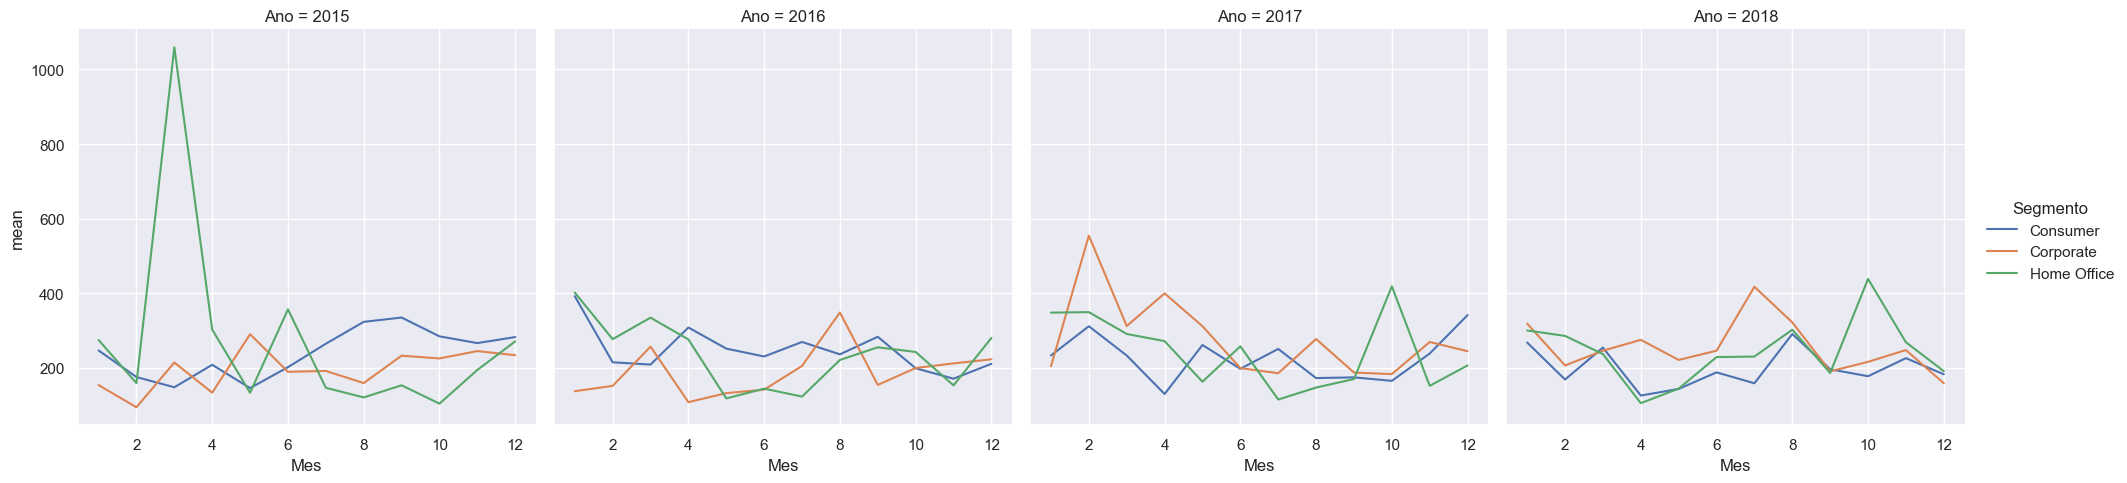

In [56]:
plt.figure(figsize=(12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_ex9,
                   y = 'mean',
                   x = meses,
                   hue = segmentos,
                   col = anos,
                   col_wrap = 4)
plt.show()